# **Programa**

In [1]:
import copy
import random
import numpy as np
import matplotlib.pyplot as plt
cm = 1/2.54  # centimeters in inches

random.seed(5) # Random pero predecible

B=1
N=-1

In [2]:
def movimientosPieza(tablero, x, y) :
    color = tablero[y][x]
    res = []

    if color != 0 :
      dir = y+color
      dirComer = y+2*(color)
      oponente = -(color)
      # Comentarios subjetivos a las fichas blancas
      if dir < 8 and dir > -1 :
        # Me puedo mover a la izquierda?
        if x > 0:
          if tablero[dir][x-1] == 0:
            res = res + [(x-1,dir)]
            # Si no, Puedo comer a la izquierda?
          elif tablero[dir][x-1] == oponente:
            if x > 1 and dirComer > -1 and dirComer < 8 :
              if tablero[dirComer][x-2] == 0:
                res = res + [(x-2,dirComer)]
        # Me puedo mover a la derecha
        if x < 7:
          if tablero[dir][x+1] == 0:
            res = res + [(x+1,dir)]
            # Sino, Puedo comer a la derecha?
          elif tablero[dir][x+1] == oponente:
            if x < 6 and dirComer > -1 and dirComer < 8 :
              if tablero[dirComer][x+2] == 0:
                res = res + [(x+2,dirComer)]

    return res

In [3]:
# Para debaguear el historial de partidas
CUADRO_NEGRO = '\033[0;0;47m'
FICHA_MUEVE = '\033[95m'
FIN_FORMATO_COLOR = '\033[0;0m'

def printCuadro (cuadro, idx, idy, origen, destino) :
  cuadro_con_formato = cuadro
  color = CUADRO_NEGRO if (idx + idy) % 2 == 0 else ''
  ox, oy = origen
  dx, dy = destino

  if cuadro == 0 :
    cuadro_con_formato = ' '
  else :
    cuadro_con_formato = 'B' if cuadro > 0 else 'N'

  if idx == ox and idy == oy :
    color = FICHA_MUEVE
    cuadro_con_formato = '#'

  if idx == dx and idy == dy :
    color = FICHA_MUEVE

  print(f'{color} {cuadro_con_formato}', end=f' {FIN_FORMATO_COLOR}')

def printTablero (tablero, origen = (None, None), destino = (None, None)) :
  print('  ', end='')
  for idy in range(8) :
    print(f' {idy} ', end='')

  print('')

  for idy, fila in enumerate(tablero) :
    print(idy, end=' ')
    for idx, cuadro in enumerate(fila) :
        printCuadro(cuadro, idx, idy, origen, destino)

    print()

In [4]:
def todosLosMovimientos (tablero) :
  movimientosBlancas = []
  movimientosNegras = []

  for y, fila in enumerate(tablero) :
    for x, cuadro in enumerate(fila) :
      movPieza = movimientosPieza(tablero, x, y)

      if len(movPieza) > 0 :
        color = tablero[y][x]
        piezaConMovs = ((x, y), movPieza)

        if color == B :
          movimientosBlancas.append(piezaConMovs)
        else :
          movimientosNegras.append(piezaConMovs)

  return (movimientosBlancas, movimientosNegras)

In [5]:
def moverPieza (tablero, origen, destino) :
  nuevoTablero = copy.deepcopy(tablero)
  xO, yO = origen
  xD, yD = destino
  xDiff = xD - xO
  yDiff = yD - yO

  nuevoTablero[yD][xD] = nuevoTablero[yO][xO]
  nuevoTablero[yO][xO] = 0

  if abs(xDiff) == 2 : # Comer pieza
    xPosComer = xO + (xDiff // 2)
    yPosComer = yO + (yDiff // 2)
    nuevoTablero[yPosComer][xPosComer] = 0

  return nuevoTablero

In [6]:
def posicionesAdyacentes(x, y) :
  adyacentes = []

  if x < 7 and y < 7 :
    adyacentes.append([x+1,y+1])
  else :
    adyacentes.append(None)


  if x < 7 and y > 0 :
    adyacentes.append([x+1,y-1])
  else :
    adyacentes.append(None)

  if x > 0 and y < 7 :
    adyacentes.append([x-1,y+1])
  else :
    adyacentes.append(None)

  if x > 0 and y > 0 :
    adyacentes.append([x-1,y-1])
  else :
    adyacentes.append(None)

  return adyacentes 

In [7]:
def colorFicha (tablero, ficha) :
  if ficha != None :
    return tablero[ficha[1]][ficha[0]]
  
  return None

In [8]:
#Esto devuelvo positivo si ganaron las blancas  y negativo si ganaron las negras
def ganador(tablero):
  fichasB, fichasN, amenazadasB, amenazadasN = contarPiezas(tablero)
  return fichasB - fichasN
#Esto devuelve la cantidad sin importar el turno
def contarPiezas (tablero) :
  fichasB = 0
  fichasN = 0
  amenazadasB = 0
  amenazadasN = 0

  for x in range(8) :
    for y in range(8) :
      casillero = tablero[y][x]
      a1, a2, a3, a4 = posicionesAdyacentes(x,y)
      dr = colorFicha(tablero, a1) #Abajo derecha
      ur = colorFicha(tablero, a2) #Arriba derecha
      dl = colorFicha(tablero, a3) #Abajo izquierda
      ul = colorFicha(tablero, a4) #Arriba izquierda

      if casillero == B :
        fichasB += 1
        if (dr == N and ul == 0) or (dl == N and ur == 0) :
          amenazadasB += 1

      elif casillero == N :
        fichasN += 1
        if (ul == B and dr == 0) or (ur == B and dl == 0) :
          amenazadasN += 1

  return [fichasB, fichasN, amenazadasB, amenazadasN]

In [9]:
def valorarTablero (tablero, pesos, turno) :
  fichasB, fichasN, amenazadasB, amenazadasN = contarPiezas(tablero)
  w0,w1,w2,w3,w4 = pesos
  if turno == B :
    return w0 + (w1 * fichasB) +( w2 * fichasN) + (w3 * amenazadasB) + (w4 * amenazadasN)
  else :
    return -(w0 + (w1 * fichasB) +( w2 * fichasN) + (w3 * amenazadasB) + (w4 * amenazadasN))


In [10]:
# retorna el tablero modificado después de jugar
def hacerJugada (tablero, jugador, movimientos) :
  # Elegir jugada mejor valorada según jugador
  maxVal = -float("Inf")
  movs = []
  origen = (None, None)
  destino = (None, None)

  for pieza, movPieza in movimientos :
    for mov in movPieza :
      valoracion = jugador(tablero, pieza, mov)

      if valoracion > maxVal :
        maxVal = valoracion
        movs = [(pieza, mov)]
      elif valoracion == maxVal :
        movs.append((pieza, mov))

  origen, destino = movs[round(random.random()*(len(movs)-1))]

  return moverPieza(tablero, origen, destino), origen, destino, maxVal

In [11]:
def mejorJugadaRival (tablero, color, pesos) :
  movsBlancas, movsNegras = todosLosMovimientos(tablero)
  fichasMueven = movsBlancas if color == B else movsNegras
  maxVal = -float("Inf")
  origen = None
  destino = None

  # Elige el mejor movimiento que supone puede hacer el contrario
  for pieza, movimientos in fichasMueven :
    for movimiento in movimientos :
      # Simulo que mueve contrincante
      tableroPrueba = moverPieza(tablero, pieza, movimiento)
      valoracion = valorarTablero(tableroPrueba, pesos, color)

      if valoracion > maxVal :
        maxVal = valoracion
        origen = pieza
        destino = movimiento

  return (origen, destino)

# **ALGORITMOS JUGADORES**

In [12]:
# Como devuelve un número random, cada movimiento va a tener una valoración random
# Lo que resulta igualmente en elegir un movimiento random
def jugadorRandom(pesos) :
  def algoritmoRandom(tablero, pieza, movimiento) :
    return random.random()

  return algoritmoRandom

In [13]:
# El que va a ser entrenado
def jugadorEntrenado (pesos) :
  #print(pesos)
  def jugador (tablero, pieza, movimiento) :
    x, y = pieza
    color = tablero[y][x]

    # Simulo muevo
    tableroPrueba = moverPieza(tablero, pieza, movimiento)

    # Simulo mueve el rival
    piezaRival, movimientoRival = mejorJugadaRival(tableroPrueba, -color, pesos)
    if piezaRival != None : # else rival no tiene movimientos
      tableroPrueba = moverPieza(tableroPrueba, piezaRival, movimientoRival)

    valoracion = valorarTablero(tableroPrueba, pesos, color)
    return valoracion

  return jugador

# **Algoritmos Grandes**

# **Jugar y competir**

In [14]:
def jugar (jugadorNegras, jugadorBlancas) :
  turnos = 1
  tablero = [[0, B, 0, B, 0, B, 0, B],
            [B, 0, B, 0, B, 0, B, 0], 
            [0, B, 0, B, 0, B, 0, B], 
            [0, 0, 0, 0, 0, 0, 0, 0], 
            [0, 0, 0, 0, 0, 0, 0, 0], 
            [N, 0, N, 0, N, 0, N, 0], 
            [0, N, 0, N, 0, N, 0, N], 
            [N, 0, N, 0, N, 0, N, 0]]
  turno = B;
  historicoTableros = [tablero]
  historicoTurnos = []
  historicoValoraciones = []
  movsBlancas, movsNegras = todosLosMovimientos(tablero)

  while len(movsBlancas) > 0 or len(movsNegras) :
    muevenTurno = movsBlancas if turno == B else movsNegras
    jugadorTurno = jugadorBlancas if turno == B else jugadorNegras

    if len(muevenTurno) > 0 :
      tablero, origen, destino, valoracion = hacerJugada(tablero, jugadorTurno, muevenTurno)
      historicoTableros.append(tablero)
      historicoTurnos.append(turno)
      historicoValoraciones.append(valoracion)
      movsBlancas, movsNegras = todosLosMovimientos(tablero);

    # print()
    # print(f'Tablero Nro. {turnos}:')
    # printTablero(tablero, origen, destino)
    # print(valoracion) 
    turno = -turno
    turnos += 1

  # print()
  # print(f'Tablero Nro. {turnos}: FIN!')
  # printTablero(tablero)
  # print(historicoValoraciones)
  return (historicoTableros, historicoTurnos, historicoValoraciones)

# **Aprender y entrenar**

In [15]:
def filtrarTableros(tableros, valoraciones, turnos, turno):
  nuevoTableros = []
  nuevoValoraciones = []
  iter = 0
  while iter < len(turnos):
    if (turnos[iter]==turno):
      nuevoTableros.append(tableros[iter])
      nuevoValoraciones.append(valoraciones[iter])
    iter = iter +1
  return nuevoTableros, nuevoValoraciones




def evaluarTableroFinal(tableros, turno, avanzado = False):
  tablero = tableros[len(tableros)-1]
  piezasB, piezasN, amenazadasB, amenazadasN = contarPiezas(tablero)
  dif = piezasB - piezasN
  if (avanzado):
    return dif if  turno == B else -dif
  if (turno == B):
    if (dif > 0):
      return 1
    elif (dif == 0):
      return 0
    elif (dif < 0):
      return -1
  else:
    if (dif < 0):
      return 1
    elif (dif == 0):
      return 0
    elif (dif > 0):
      return -1

def aprenderTurno(tablero, valEntrenamiento, valOperacional, pesosParametro, turno, iter):
  u = 0.1 * (1 / iter)
  piezasB, piezasN, amenazadasB, amenazadasN = contarPiezas(tablero)
  #Le agregamos el uno para poder iterar bien con el w0
  xis = [1,  piezasB, piezasN, amenazadasB, amenazadasN]
  
  w0,w1,w2,w3,w4 = pesosParametro
  pesos = [w0,w1,w2,w3,w4]
  xis = [ 1, piezasB, piezasN, amenazadasB, amenazadasN ]

  for iter in range(5) :
    pesos[iter] = pesos[iter] + u*(valEntrenamiento - valOperacional)*xis[iter]

  error = ((w0 - pesos[0])**2 + (w1 - pesos[1])**2 + (w2 - pesos[2])**2 + (w3 - pesos[3])**2 + (w4 - pesos[4])**2)
 
  pesos = pesos / np.linalg.norm(pesos)

  return (pesos,error)

def aprender (tableros, valoraciones, turnos, pesos, turno, avanzado = False):
  tableros, valoraciones = filtrarTableros(tableros, valoraciones,turnos, turno)
  pesosViejos = copy.deepcopy(pesos)
  errores = []

  for i in range(len(tableros)-1):
    tab = tableros[i] # Este es el tablero cuando comienza mi turno, me toca mover
    valEnt = valorarTablero(tableros[i+1], pesosViejos, turno) #Valoro el tablero que me devuelve el enemigo
    valOp = valorarTablero(tableros[i], pesos, turno) #valoro mi tablero antes de atacar
    pesos, error = aprenderTurno(tab, valEnt, valOp, pesos,turno,i+1)
    errores.append(error)

  ultimaValoracion = evaluarTableroFinal(tableros, turno, avanzado)
  tab = tableros[-1]
  valEnt = valorarTablero(tab, pesos,turno)
  pesosNuevos, error = aprenderTurno(tab, valEnt,ultimaValoracion, pesos, turno, 1)

  # Analizar resultado final de la partida
  return pesosNuevos, error


In [16]:
# Notar que aprendiz y contrincante ya son las funciones de valorar
def entrenar (aprendiz, contrincante, pesosAprendiz, pesosRival, maxIteraciones, turno, avanzado = False) :
  iteracion = 0
  pesosHistory = [pesosAprendiz]
  resultado = [0,0,0] # gano, empate, pierdo
  porcentajeVictorias = 0
  pvHistory = [0]
  
  algoritmoAprendiz = aprendiz(pesosAprendiz)
  algoritmoContrincante = contrincante(pesosRival)

  jugadorBlancas = algoritmoAprendiz if turno == B else algoritmoContrincante
  jugadorNegras = algoritmoContrincante if turno == B else algoritmoAprendiz

  while iteracion < maxIteraciones:
    tableros, turnos, valoraciones = jugar(jugadorNegras, jugadorBlancas)
    pesosAprendiz, error = aprender(tableros, valoraciones, turnos, pesosAprendiz,turno, avanzado)
    pesosHistory.append(pesosAprendiz)
    algoritmoAprendiz = aprendiz(pesosAprendiz)

    resultadoPartida = evaluarTableroFinal(tableros,turno)

    if (resultadoPartida == 1):
      resultado[0] = resultado[0] + 1 
    elif (resultadoPartida == 0):
      resultado[1] = resultado[1] + 1 
    elif (resultadoPartida == -1):
      resultado[2] = resultado[2] + 1 
    iteracion = iteracion + 1

    porcentajeVictorias = resultado[0]/(resultado[0]+resultado[1]+resultado[2])
    pvHistory.append(porcentajeVictorias)

  return resultado, pesosHistory, pvHistory

In [17]:
def competir (pesos1, pesos2, cantPartidas) :
  gana = 0
  empata = 0
  pierde = 0
  jugador1 = jugadorEntrenado(pesos1)
  jugador2 = jugadorEntrenado(pesos2)

  for i in range(cantPartidas) :
    tableros, turnos, valoraciones = jugar(jugador1, jugador2)
    resultado = evaluarTableroFinal(tableros, N)
    gana += 1 if resultado == 1 else 0
    empata += 1 if resultado == 0 else 0
    pierde += 1 if resultado == -1 else 0

  for i in range(cantPartidas) :
    tableros, turnos, valoraciones = jugar(jugador2, jugador1)
    resultado = evaluarTableroFinal(tableros, B)
    gana += 1 if resultado == 1 else 0
    empata += 1 if resultado == 0 else 0
    pierde += 1 if resultado == -1 else 0

  print(gana, empata, pierde, ' - JUGADOR1, EMPATA, JUGADOR2')

  return (gana, pierde, empata)

# Entrenamiento

## Entrenando contra un oponente que siempre juegue de forma aleatoria

[98, 2, 0]
pesos:  [ 8.46160985e-02  9.92856523e-01  8.41184999e-02 -6.81792841e-05
 -3.36364996e-04]


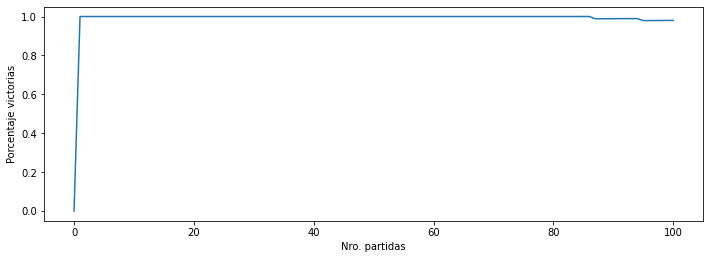

[96, 2, 2]
pesos:  [-0.15172411  0.22333128 -0.96184435  0.02148607  0.03868765]


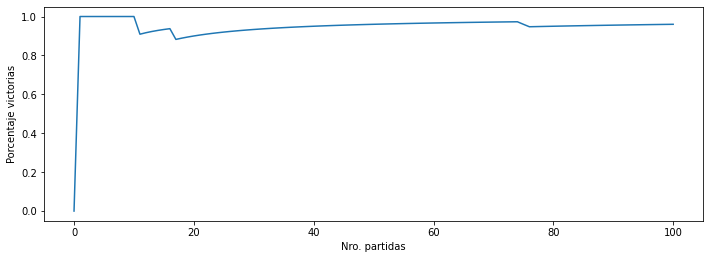

In [18]:
pesosEntrenado = (0.5, 0.7, -0.7,  -0.9, 0.5)
resultado, pesos1, racha1 = entrenar(jugadorEntrenado, jugadorRandom, pesosEntrenado, None, 100, B)

print(resultado)
pesosEntrenado = pesos1[-1]
print("pesos: ", pesosEntrenado)

plt.subplots(figsize=(30*cm, 10*cm))
plt.plot(racha1)
plt.xlabel('Nro. partidas')
plt.ylabel('Porcentaje victorias')
plt.show()

resultado, pesos2, racha2 = entrenar(jugadorEntrenado, jugadorRandom, pesosEntrenado, None, 100, N)

print(resultado)
pesosEntrenado = pesos2[-1]
print("pesos: ", pesosEntrenado)
pesosNivel1 = copy.deepcopy(pesosEntrenado)

plt.subplots(figsize=(30*cm, 10*cm))
plt.plot(racha2)
plt.xlabel('Nro. partidas')
plt.ylabel('Porcentaje victorias')
plt.show()

## Entrenando contra un oponente que sea la versión del propio jugador de alguna iteración anterior. 

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[64, 40, 96]
pesos:  [-8.14851241e-02 -3.69173603e-01 -8.09601747e-01  4.49016638e-01
 -3.09421062e-04]


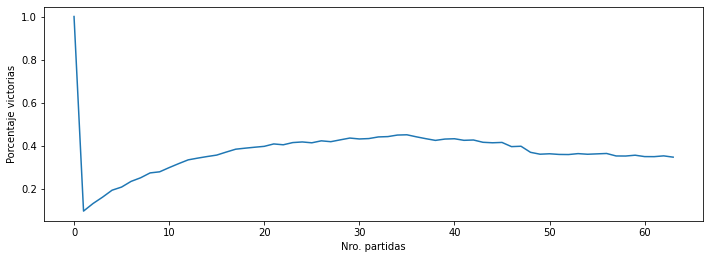

In [19]:
resultado = [0,0,0]
pesos = []
racha = []
victorias = 0
pesosEntrenado = (0.5, 0.7, -0.7,  -0.9, 0.5)
pesosIterAnterior = copy.deepcopy(pesosEntrenado)
resPartidas = []

for i in range(100) :
  if (i % 10) == 0 :
    pesosIterAnterior = copy.deepcopy(pesosEntrenado)
  resultado2, pesosA2, racha2 = entrenar(jugadorEntrenado, jugadorEntrenado, pesosEntrenado, pesosIterAnterior, 1, N)
  pesosEntrenado = pesosA2[-1]
  victoria = 1 if resultado2[0] == 1 else 0;
  resPartidas.append(victoria) # 1 si gana 

  resultado1, pesosA1, racha1 = entrenar(jugadorEntrenado, jugadorEntrenado, pesosEntrenado, pesosIterAnterior, 1, B)
  pesosEntrenado = pesosA1[-1]
  victoria = 1 if resultado1[0] == 1 else 0;
  resPartidas.append(victoria)
  resultado[0] = resultado[0] + resultado2[0] + resultado1[0]
  resultado[1] = resultado[1] + resultado2[1] + resultado1[1]
  resultado[2] = resultado[2] + resultado2[2] + resultado1[2]

cantPartidas = 0

for r in resPartidas :
  cantPartidas += 1
  if r == 1 : # else 0 si pierde o empata
    victorias += 1;
    racha.append(victorias / cantPartidas)

print(resultado)
print("pesos: ", pesosEntrenado)
pesosNivel2 = copy.deepcopy(pesosEntrenado)
plt.subplots(figsize=(30*cm, 10*cm))
plt.plot(racha)
plt.xlabel('Nro. partidas')
plt.ylabel('Porcentaje victorias')
plt.show()

## Jugador con resultado final igual a la diferencia de fichas
Entrenando el jugador contra el anterior

[84, 13, 3]
pesos:  [-0.09003505 -0.82357577 -0.56000407  0.00092092  0.00335191]


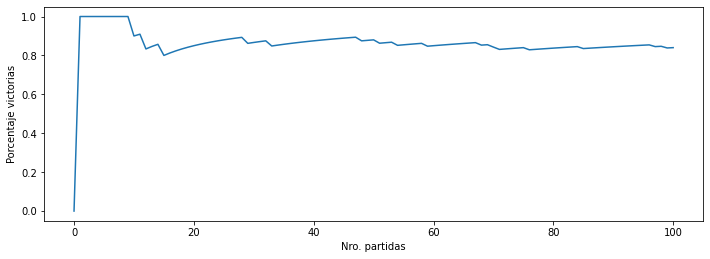

[5, 2, 93]
pesos:  [-0.13419059 -0.95085102  0.25430458  0.11078565  0.03051124]


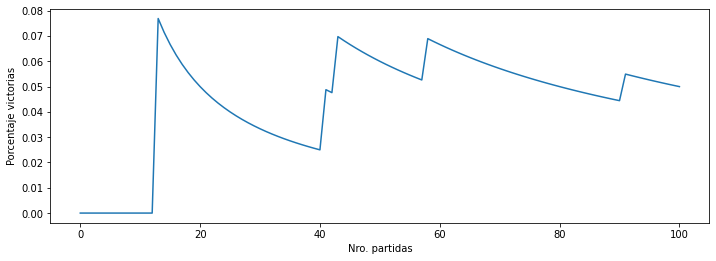

In [20]:
pesosEntrenado = (0.5, 0.7, -0.7,  -0.9, 0.5)

resultado, pesos1, racha1 = entrenar(jugadorEntrenado, jugadorEntrenado, pesosEntrenado, pesosNivel2, 100, B, True)
print(resultado)
pesosEntrenado = pesos1[-1];
print("pesos: ", pesosEntrenado)
plt.subplots(figsize=(30*cm, 10*cm))
plt.plot(racha1)
plt.xlabel('Nro. partidas')
plt.ylabel('Porcentaje victorias')
plt.show()

resultado, pesos2, racha2 = entrenar(jugadorEntrenado, jugadorEntrenado, pesosEntrenado, pesosNivel2, 100, N, True)
print(resultado)
pesosEntrenado = pesos2[-1];
print("pesos: ", pesosEntrenado)
pesosNivel3 = copy.deepcopy(pesosEntrenado)

plt.subplots(figsize=(30*cm, 10*cm))
plt.plot(racha2)
plt.xlabel('Nro. partidas')
plt.ylabel('Porcentaje victorias')
plt.show()

## Compitiendo los tres jugadores

In [ ]:
print('Principiante', pesosNivel1)
print('Intermedio', pesosNivel2)
print('Avanzado', pesosNivel3)
competir(pesosNivel1, pesosNivel2, 250)
competir(pesosNivel2, pesosNivel3, 250)
competir(pesosNivel1, pesosNivel3, 250)


Principiante [-0.15172411  0.22333128 -0.96184435  0.02148607  0.03868765]
Intermedio [-8.14851241e-02 -3.69173603e-01 -8.09601747e-01  4.49016638e-01
 -3.09421062e-04]
Avanzado [-0.13419059 -0.95085102  0.25430458  0.11078565  0.03051124]
